In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
import random as rnd
import cv2

In [10]:
parent_dir = "C:\\Users\\jains\\Desktop\\aventus\\archive (1)\\Alzheimer_s Dataset"
train_dir = os.path.join(parent_dir,'train')
test_dir = os.path.join(parent_dir,'test')

In [13]:
classes = os.listdir(train_dir)

In [31]:
def display_img():
    class_name = rnd.choice(classes)
    path = os.path.join(train_dir,class_name)
    imgs_file = os.listdir(path)
    img = cv2.imread(os.path.join(path,rnd.choice(imgs_file)))
    img = cv2.resize(img,(224,224))
    plt.imshow(img)
    plt.title(class_name)
    

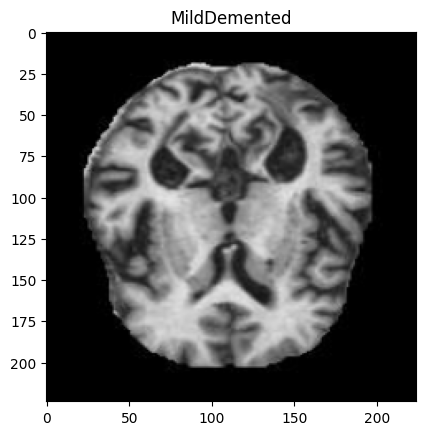

In [33]:
display_img()

In [34]:
train_data_gen = ImageDataGenerator(rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=50,)

In [38]:
train_data = train_data_gen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               class_mode='categorical',
                                               batch_size=32,
                                               shuffle=True,
                                               subset="training",
                                                           )


valid_data = train_data_gen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               class_mode='categorical',
                                               batch_size=32,
                                               shuffle=True,
                                               subset="validation")

Found 5121 images belonging to 4 classes.
Found 0 images belonging to 4 classes.
